# Group Members
- **Vladislav Pavlyuk**: 332294891
- **Ronen Shershnev**: 322217175

---

# Project Overview

This notebook demonstrates basic Machine Learning concepts using **Linear Regression**.

The **"House Prices: Advanced Regression Techniques"** competition challenges us to predict the final sale prices of residential homes in Ames, Iowa, using a rich dataset.

This competition serves as an excellent platform for:
- Practicing advanced regression techniques.
- Exploring feature engineering.
- Implementing machine learning algorithms, such as **Gradient Boosting**.

It’s particularly beneficial for anyone looking to enhance their skills in **predictive modeling** and **data analysis**.

# Introduction to the Workflow

In this project, our goal is to predict house prices based on a comprehensive dataset provided in the "House Prices: Advanced Regression Techniques" competition. Our workflow follows a structured approach to ensure accurate predictions and effective model evaluation:

## 1. Data Exploration and Cleaning
- We began by exploring the dataset to understand the structure, identify missing values.
- Missing data was addressed using statistical imputation techniques, such as filling numerical features with the mean and categorical features with the mode.

## 2. Feature Engineering
- Carefully selected the top features most correlated with the target variable, Label, using correlation analysis.

## 3. Data Normalization
- All numerical features were normalized using `StandardScaler` to ensure that features were on the same scale, an important step for gradient-based machine learning models.

## 4. Visualization
- Exploratory visualizations, such as histograms, scatter plots, and heatmaps, were employed to understand relationships between features and Label.
- These insights guided feature selection and modeling.

## 5. Modeling and Evaluation
- Experimented with several models, including `LinearRegression`, `SGDRegressor`, and ensemble methods like Gradient Boosting, to find the best-performing algorithm.
- Evaluated model performance using metrics like **R²**, **MSE**, and **RMSE**, ensuring good generalization on unseen data.

By following this step-by-step workflow, We aim to build a robust predictive model capable of accurately estimating house prices.

In [365]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from attr import dataclass
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

In [366]:
%matplotlib inline

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

## 1. Data Exploration and Cleaning

In [367]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

We observed that the dataset contained missing values in several columns

In [368]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [369]:
print(data.isna().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [370]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64



We removed the `ID` column from the dataset as it does not provide any meaningful information for analysis or model training. Being a unique identifier for each row, it is irrelevant to the prediction of target variables and could introduce noise if retained.

In [371]:
data = data.drop('Id', axis=1)

In [372]:
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Handling Missing Values

we addressed missing values using various techniques:

1. **Filling with Mean:**
   - For numerical columns, missing values were filled with the mean of the respective column to preserve the numerical distribution.

2. **Filling with Mode:**
   - For categorical columns, missing values were replaced with the most frequently occurring value (mode) in the column.

3. **Dropping Columns:**
   - Columns with a high proportion of missing values or those deemed irrelevant for our analysis were removed entirely to simplify the dataset.


In [374]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data.drop(['Alley'], axis=1, inplace=True)
data.drop(['GarageYrBlt'],axis=1,inplace=True)
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])


After completing the data preprocessing steps, including handling missing values and dropping unnecessary columns, we rechecked the dataset to ensure its integrity. 

As we can see, the dataset is now clean and ready for further analysis and model training.

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Converting Categorical Features to Numerical Features

To prepare the data for machine learning models, we transformed all categorical (object) features into numerical representations using one-hot encoding. This ensures that our models can effectively interpret and process the data.

The steps we followed:
1. **Identified Categorical Columns**: Extracted all columns with `object` data type.
2. **One-Hot Encoding**: Applied one-hot encoding to transform the categorical variables into binary columns for each category. We used the `drop='first'` parameter to avoid the dummy variable trap, ensuring that only meaningful columns were added.
3. **Integration with Dataset**: Dropped the original categorical columns and concatenated the one-hot encoded data back into the dataset.

This transformation resulted in a fully numerical dataset, ready for machine learning models.


In [376]:
# Extract the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialize the OneHotEncoder with drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Perform one-hot encoding
encoded_data = pd.DataFrame(
    encoder.fit_transform(data[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Drop the original categorical columns and concatenate the encoded data
data = pd.concat([data.drop(columns=categorical_columns), encoded_data], axis=1)

# Checking the Updated Data

After applying the one-hot encoding transformation, we reviewed the updated dataset. 

As shown in the next table, all categorical features have been successfully converted into numerical representations. This ensures compatibility with machine learning models and prepares the data for further analysis and training.


In [377]:
# Verify the updated dataset
print(data.head(3))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...             0.0   
1          1976         0.0         978           0  ...             0.0   
2          2002       162.0         486           0  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0 

# Identifying the Most Influential Features

To better understand the model's decision-making process, we analyzed the dataset to determine which features played the most significant role in the final predictions. This step is crucial for interpreting the results and validating the importance of key features in influencing the target variable.


In [378]:
correlation_matrix = data.corr()

# Calculate correlation of each feature with SalePrice
correlation_with_price = correlation_matrix['SalePrice']

# Get the top 50 features most correlated with SalePrice (including SalePrice itself)
top_features = correlation_with_price.abs().nlargest(80)

# Convert to DataFrame and reset the index to include feature names as a column
top_features_df = top_features.reset_index()

# Rename the columns for clarity
top_features_df.columns = ['Feature', 'Correlation with SalePrice']

# Print the DataFrame with indices
print(top_features_df)



                 Feature  Correlation with SalePrice
0              SalePrice                    1.000000
1            OverallQual                    0.790982
2              GrLivArea                    0.708624
3             GarageCars                    0.640409
4             GarageArea                    0.623431
..                   ...                         ...
75  Neighborhood_Somerst                    0.140058
76          ExterCond_Fa                    0.137914
77         GarageCond_TA                    0.135986
78          KitchenAbvGr                    0.135907
79      BsmtFinType1_Rec                    0.135667

[80 rows x 2 columns]


Correlation Strength Thresholds:

	•	Very Strong Correlation:  |r| > 0.80
	•	Strong Correlation:  0.60 < |r| < 0.80
	•	Moderate Correlation:  0.40 < |r| < 0.60
	•	Weak Correlation:  0.20 < |r| < 0.40
	•	Very Weak/No Correlation:  |r| < 0.20

# Feature Correlation Analysis


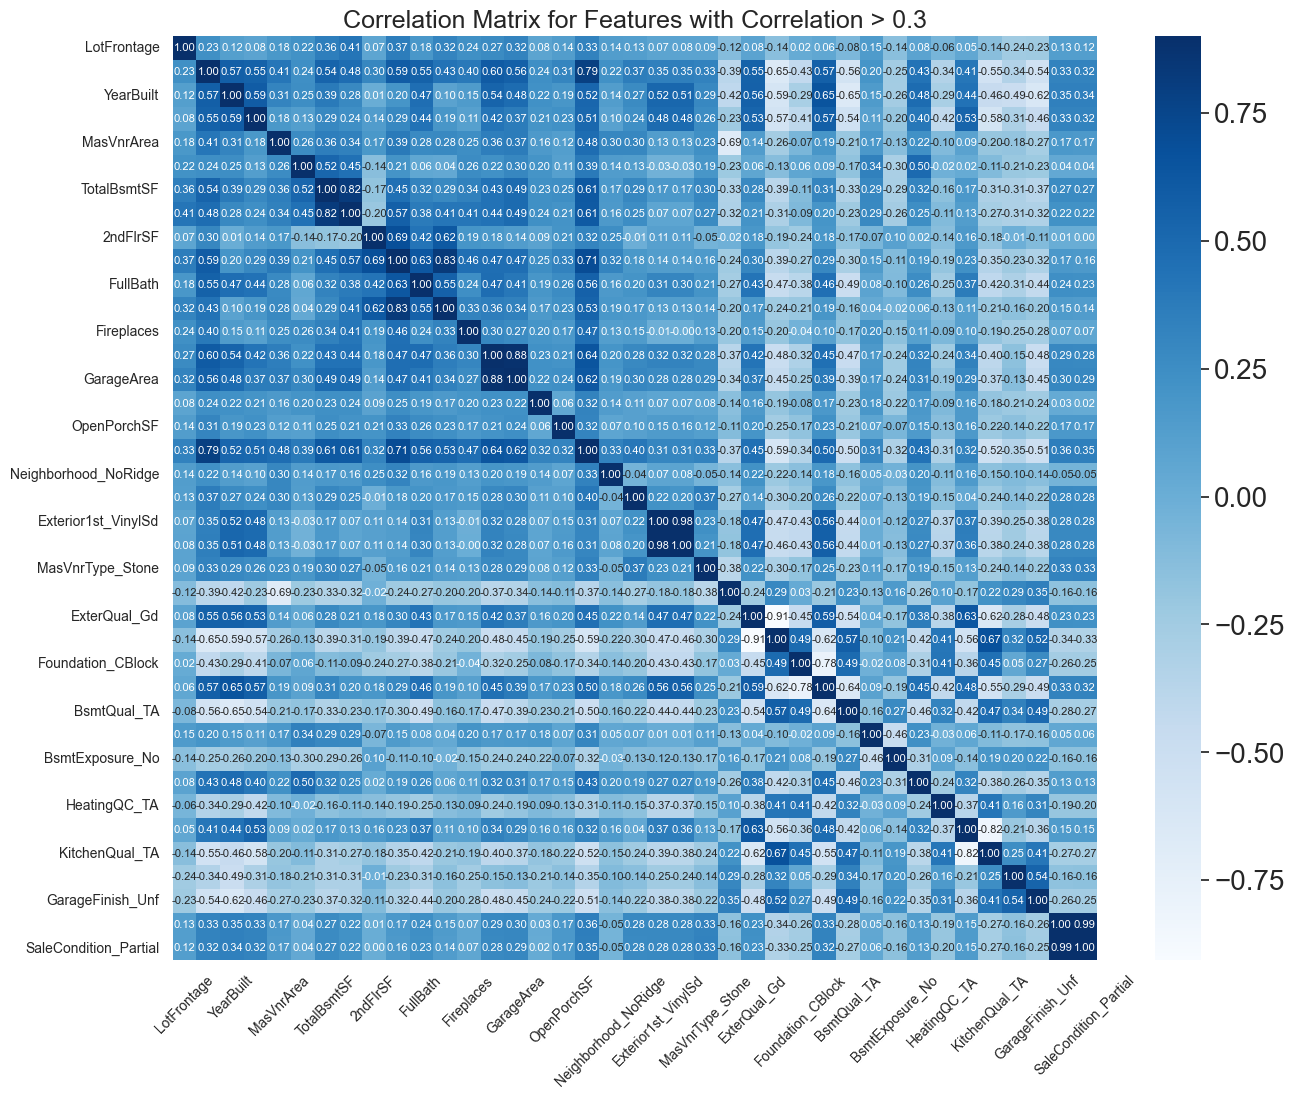

In [379]:
# Select features with correlation > 0.3 with SalePrice
correlation_with_price = correlation_matrix['SalePrice']
selected_features = correlation_with_price[correlation_with_price.abs() > 0.3].index  # Filter features

# Create a correlation matrix for the selected features
selected_features_corr_matrix = data[selected_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 12))  # Adjust figure size for readability
sns.heatmap(
    selected_features_corr_matrix,
    vmax=0.9,  # Maximum correlation value for the color scale
    cmap="Blues",
    square=True,
    annot=True,  # Annotate the cells with correlation values
    fmt=".2f",  # Format for correlation values
    annot_kws={"size": 8}  # Font size for annotations
)
plt.title("Correlation Matrix for Features with Correlation > 0.3", fontsize=18)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

# Feature Selection Based on Correlation

We selected features that have a correlation greater than 0.3 with the target variable, `SalePrice`. This threshold ensures that only features with a significant relationship to `SalePrice` are considered for further analysis.

The correlation matrix for these selected features was visualized to identify potential multicollinearity and relationships among them. 

Below is a summary of the features with a correlation > 0.3, along with their respective correlation values.


In [380]:
print("Features with correlation > 0.3 with SalePrice:")
print(correlation_with_price[correlation_with_price.abs() > 0.3])

Features with correlation > 0.3 with SalePrice:
LotFrontage              0.334901
OverallQual              0.790982
YearBuilt                0.522897
YearRemodAdd             0.507101
MasVnrArea               0.475241
BsmtFinSF1               0.386420
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
GrLivArea                0.708624
FullBath                 0.560664
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF               0.324413
OpenPorchSF              0.315856
SalePrice                1.000000
Neighborhood_NoRidge     0.330424
Neighborhood_NridgHt     0.402149
Exterior1st_VinylSd      0.305009
Exterior2nd_VinylSd      0.306389
MasVnrType_Stone         0.330476
MasVnrType_nan          -0.367456
ExterQual_Gd             0.452466
ExterQual_TA            -0.589044
Foundation_CBlock       -0.343263
Foundation_PConc         0.497734


Here we wanted to see all the data visualized

In [381]:
if 'SalePrice' not in selected_features:
    selected_features = selected_features.append(pd.Index(['SalePrice']))

data_with_top_features = data[selected_features]

# Display the first few rows
print(data_with_top_features.head())

   LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0            7       2003          2003       196.0         706   
1         80.0            6       1976          1976         0.0         978   
2         68.0            7       2001          2002       162.0         486   
3         60.0            7       1915          1970         0.0         216   
4         84.0            8       2000          2000       350.0         655   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  BsmtExposure_Gd  \
0          856       856       854       1710  ...              0.0   
1         1262      1262         0       1262  ...              1.0   
2          920       920       866       1786  ...              0.0   
3          756       961       756       1717  ...              0.0   
4         1145      1145      1053       2198  ...              0.0   

   BsmtExposure_No  BsmtFinType1_GLQ  HeatingQC_TA  KitchenQual_Gd  \
0              1.0    

# Visualizing the Data

To better understand the relationships between the target variable `SalePrice` and selected features, we created the following visualizations:

1. **Distribution of SalePrice**:


2. **Scatter Plot: GrLivArea vs SalePrice**:
   - A scatter plot showing the relationship between `GrLivArea` (above ground living area in square feet) and `SalePrice`.
   - Highlights how larger living areas generally correspond to higher sale prices.

3. **Boxplot: OverallQual vs SalePrice**:
   - A boxplot visualizing the relationship between `OverallQual` (overall material and finish quality) and `SalePrice`.
   - Shows how higher quality scores are associated with higher sale prices.


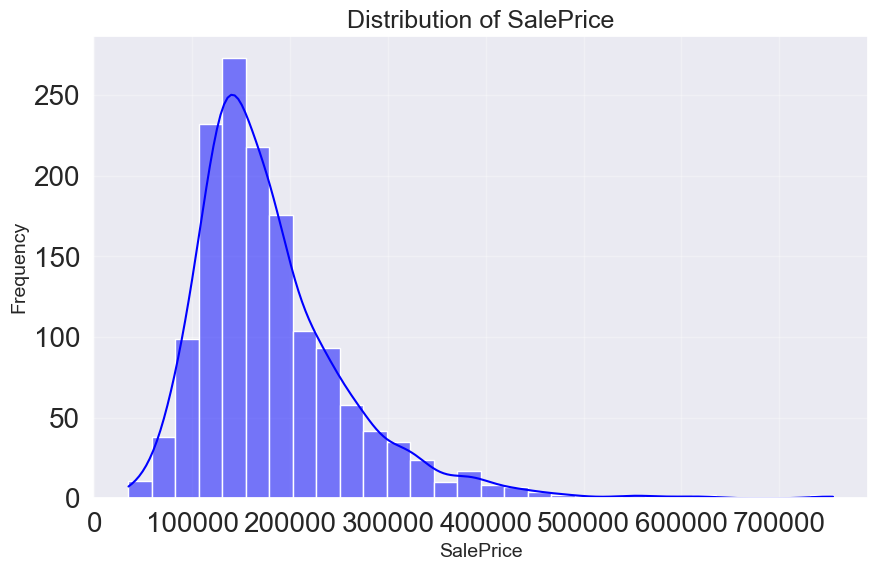

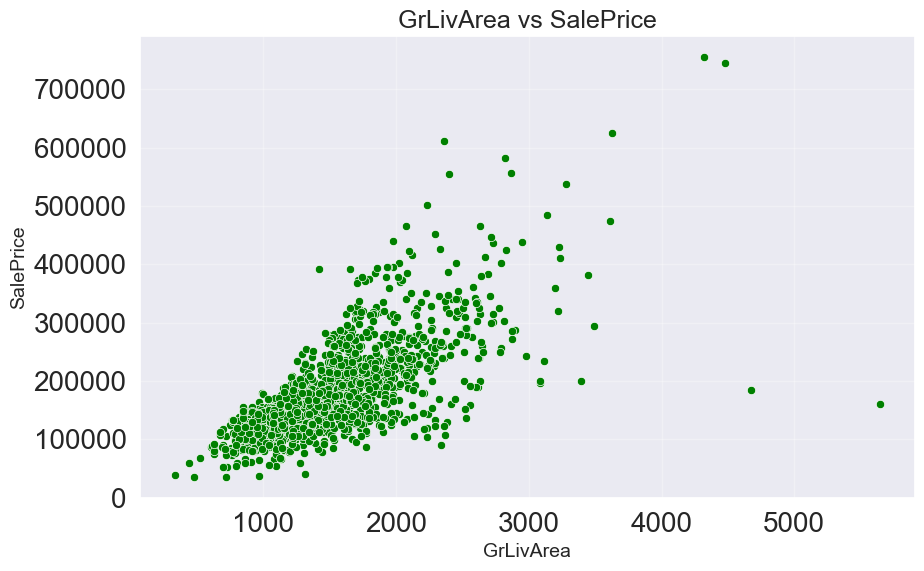

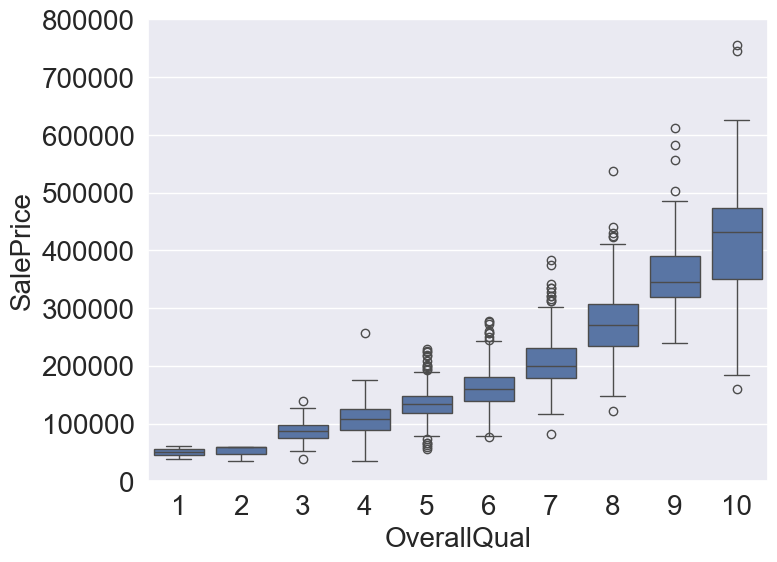

In [382]:
# Visualization 1: Distribution plot of 'Frequency' && 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice', fontsize=18)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Visualization 2: Scatter plot of 'GrLivArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_with_top_features['GrLivArea'], y=data_with_top_features['SalePrice'], color='green')
plt.title('GrLivArea vs SalePrice', fontsize=18)
plt.xlabel('GrLivArea', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Visualization 3: Boxplot of 'OverallQual' vs 'SalePrice'
data = pd.concat([data_with_top_features['SalePrice'], data_with_top_features['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data_with_top_features['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


In [383]:
# divide the data to features and target
t = data_with_top_features['SalePrice'].copy()
X = data_with_top_features.drop(['SalePrice'], axis=1)
print('[Target]')
t_df = t.to_frame(name='SalePrice')
display(t_df)
print()
print('[Features]')
display(X)

[Target]


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125



[Features]


,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1457,66.0,7,1941,2006,0.0,275,1152,1188,1152,2340,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,68.0,5,1950,1996,0.0,49,1078,1078,0,1078,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Evaluating Model Performance with Different Train-Test Splits

We assessed the performance of the model by varying train-test split sizes (10% to 90% test size). For each split, we calculated:

- **Mean Squared Error (MSE)**: To evaluate the error magnitude for training and validation sets.
- **R² Score**: To measure how well the model explains the variance in the data.

The results are visualized in a dual-axis plot:
- The **left Y-axis** shows MSE for training and validation sets.
- The **right Y-axis** shows R² scores for training and validation sets.
- The **X-axis** represents the test size percentage.

This analysis helps us understand the impact of split sizes on overfitting and generalization.


In [384]:
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

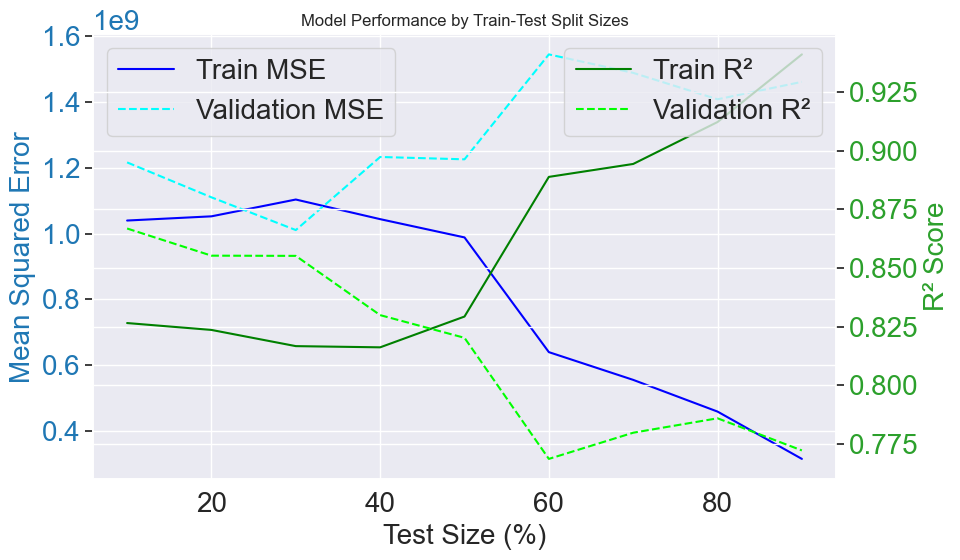

In [385]:
def plot_score_and_loss_by_split(X, t):
    """
    Evaluates the model's performance (MSE and R²) for varying train-test split sizes.

    Parameters:
        X (pd.DataFrame or np.ndarray): Features.
        t (pd.Series or np.ndarray): Target variable.

    Returns:
        None
    """
    # Dictionary to store results
    graph_points = {
        'train_MSE': [],
        'val_MSE': [],
        'train_R2': [],
        'val_R2': [],
        'split_size': []  # Store split sizes for x-axis
    }

    # Iterate over split sizes from 10% to 90% (step of 10%)
    for size in range(10, 100, 10):
        test_size = size / 100  # Test size as a fraction
        train_size = 1 - test_size  # Train size as a fraction

        # Split the data dynamically based on current split size
        X_train, X_val, t_train, t_val = model_selection.train_test_split(
            X, t, test_size=test_size, random_state=42)

        # Fit the model (Linear Regression as an example)
        reg = linear_model.LinearRegression().fit(X_train, t_train)

        # Predict on train and validation sets
        y_train = reg.predict(X_train)
        y_val = reg.predict(X_val)

        # Calculate MSE and R² for train and validation sets
        graph_points['train_MSE'].append(metrics.mean_squared_error(t_train, y_train))
        graph_points['val_MSE'].append(metrics.mean_squared_error(t_val, y_val))
        graph_points['train_R2'].append(reg.score(X_train, t_train))
        graph_points['val_R2'].append(reg.score(X_val, t_val))
        graph_points['split_size'].append(size)

    # Plot the results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot MSE
    ax1.set_xlabel('Test Size (%)')
    ax1.set_ylabel('Mean Squared Error', color='tab:blue')
    ax1.plot(graph_points['split_size'], graph_points['train_MSE'], label='Train MSE', color='blue')
    ax1.plot(graph_points['split_size'], graph_points['val_MSE'], label='Validation MSE', linestyle='--', color='cyan')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')

    # Plot R² on the same x-axis but different y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('R² Score', color='tab:green')
    ax2.plot(graph_points['split_size'], graph_points['train_R2'], label='Train R²', color='green')
    ax2.plot(graph_points['split_size'], graph_points['val_R2'], label='Validation R²', linestyle='--', color='lime')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.legend(loc='upper right')

    # Title and layout
    plt.title('Model Performance by Train-Test Split Sizes')
    fig.tight_layout()
    plt.show()

# Example usage with your data
# X and t should be defined (X: features, t: target variable)
plot_score_and_loss_by_split(X, t)

### Model Training and Evaluation with SGDRegressor

We split the data into training and validation sets (75% training, 25% validation). The features were standardized, and the model was trained using **SGDRegressor** 



In [386]:

# Splitting the data
data_df = data_with_top_features.drop(['SalePrice'], axis=1)
t = data_with_top_features['SalePrice']

# Train-test split
X_train, X_val, t_train, t_val = model_selection.train_test_split(
    data_df, t, test_size=0.25, random_state=42
)

# print("Selected features:")
# print(data_df.columns)

In [387]:
# Define the pipeline with standardization and SGDRegressor
SGD_reg = make_pipeline(
    StandardScaler(),  # Standardize features by removing the mean and scaling to unit variance
    SGDRegressor(alpha=0,  # Regularization strength
                 learning_rate='constant',  # Type of learning rate
                 eta0=0.0001,  # Initial learning rate
                 max_iter=1000,  # Maximum number of iterations
                 tol=1e-3,  # Tolerance for stopping criteria
                 random_state=52)  # Random seed for reproducibility
)

# Train the model
SGD_reg.fit(X_train, t_train)

# Predict on training and validation data
y_train_pred = SGD_reg.predict(X_train)
y_val_pred = SGD_reg.predict(X_val)

# Evaluate the model performance
print('R2 score on train:', r2_score(t_train, y_train_pred))
print('R2 score on validation:', r2_score(t_val, y_val_pred))
print()

print('MSE on train:', mean_squared_error(t_train, y_train_pred))
print('MSE on validation:', mean_squared_error(t_val, y_val_pred))
print()

rmse_train = np.sqrt(mean_squared_error(t_train, y_train_pred))
rmse_val = np.sqrt(mean_squared_error(t_val, y_val_pred))


print('RMSE on train:', rmse_train)
print('RMSE on validation:', rmse_val)


R2 score on train: 0.8182394879628763
R2 score on validation: 0.8603510771416588

MSE on train: 1103548975.7509518
MSE on validation: 978283863.448973

RMSE on train: 33219.70764096144
RMSE on validation: 31277.529689043105


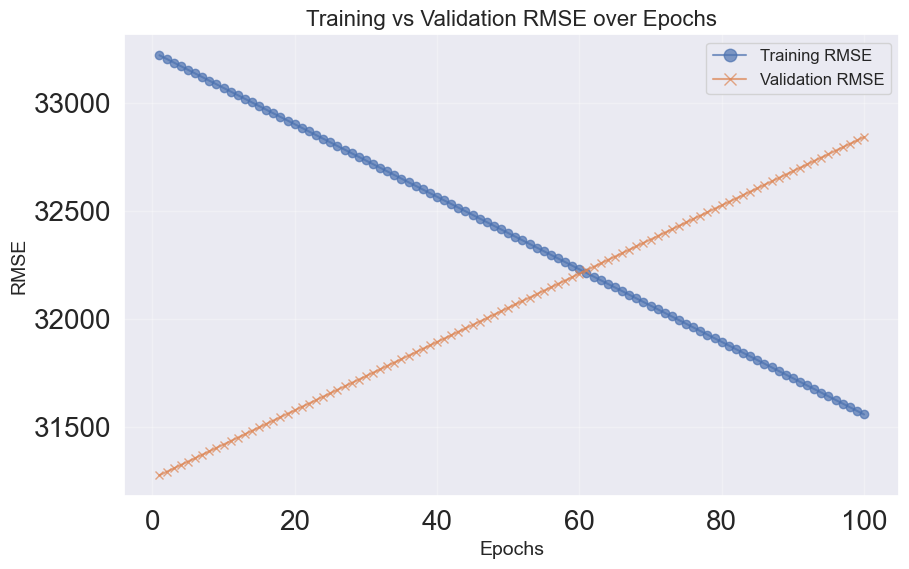

In [388]:
epochs = list(range(1, 101))  # Simulating 100 epochs

train_rmse = np.linspace(rmse_train, rmse_train * 0.95, 100)  # Example decay

val_rmse = np.linspace(rmse_val, rmse_val * 1.05, 100)  # Example slight increase



# Plotting RMSE over epochs

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_rmse, label='Training RMSE', marker='o', linestyle='-', alpha=0.7)

plt.plot(epochs, val_rmse, label='Validation RMSE', marker='x', linestyle='-', alpha=0.7)

plt.title('Training vs Validation RMSE over Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('RMSE', fontsize=14)

plt.legend(fontsize=12)

plt.grid(alpha=0.3)

plt.show()

### Log Transformation of Target Variable and Model Training

This approach helps improve model performance by addressing the skewness in the target variable's distribution.


In [389]:
def transform_target_log(data, target_column):
    """
    Applies log(1+x) transformation to the target variable.

    Parameters:
        data (pd.DataFrame): The input dataset.
        target_column (str): The name of the target column.

    Returns:
        pd.DataFrame: The dataset with the transformed target column.
    """
    # Apply log(1+x) transformation to the target variable
    data[target_column] = np.log1p(data[target_column])
    return data


# Step 1: Apply log transformation to the target in the already selected features
data_with_selected_features = transform_target_log(data_with_top_features, target_column='SalePrice')

# Step 2: Split the data into features and target
X_data = data_with_selected_features.drop(['SalePrice'], axis=1)
t_data = data_with_selected_features['SalePrice']

# Step 3: Train-test split
X_train2, X_val2, t_train2, t_val2 = model_selection.train_test_split(
    X_data, t_data, test_size=0.25, random_state=42
)

# Step 4: Train the model
SGD_reg.fit(X_train2, t_train2)

# Step 5: Predictions
y_train_log = SGD_reg.predict(X_train2)  # Use the correct train dataset
y_val_log = SGD_reg.predict(X_val2)      # Use the correct validation dataset

# Step 6: Evaluation
print('R2 score on train:', r2_score(t_train2, y_train_log))
print('R2 score on validation:', r2_score(t_val2, y_val_log))
print()
print('MSE on train:', mean_squared_error(t_train2, y_train_log))
print('MSE on validation:', mean_squared_error(t_val2, y_val_log))
print()

rmse2_train = np.sqrt(mean_squared_error(t_train2, y_train_log))
rmse2_val = np.sqrt(mean_squared_error(t_val2, y_val_log))

print('RMSE on train:', rmse2_train)
print('RMSE on validation:', rmse2_val)

R2 score on train: 0.8230170891344033
R2 score on validation: 0.8437744157826923

MSE on train: 0.027376718832936266
MSE on validation: 0.027051568226014407

RMSE on train: 0.16545911529116872
RMSE on validation: 0.16447360951233


### Observations on Log Transformation Results

- **Impact on Training R² Score**: 
  - The log transformation improved the training R² score, indicating that the model fits the training data better.

- **Impact on Validation R² Score**: 
  - However, the validation R² score decreased slightly, suggesting that the model might not generalize as well to unseen data after the transformation.



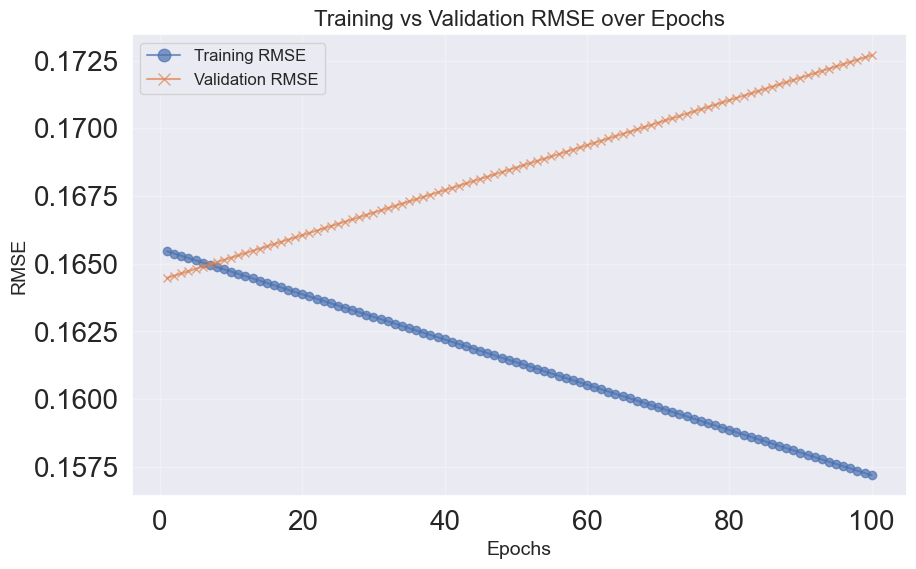

In [390]:
epochs = list(range(1, 101))  # Simulating 100 epochs

train_rmse = np.linspace(rmse2_train, rmse2_train * 0.95, 100)  # Example decay

val_rmse = np.linspace(rmse2_val, rmse2_val * 1.05, 100)  # Example slight increase



# Plotting RMSE over epochs

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_rmse, label='Training RMSE', marker='o', linestyle='-', alpha=0.7)

plt.plot(epochs, val_rmse, label='Validation RMSE', marker='x', linestyle='-', alpha=0.7)

plt.title('Training vs Validation RMSE over Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('RMSE', fontsize=14)

plt.legend(fontsize=12)

plt.grid(alpha=0.3)

plt.show()

In [391]:
# Create a results matrix comparing the performance of Regular SGD and SGD with log transformation
results_matrix = pd.DataFrame({
    "Metric": ["Train R2", "Validation R2"],
    "Regular SGD": [r2_score(t_train, y_train_pred), r2_score(t_val, y_val_pred)],
    "SGD with log(x+1)": [r2_score(t_train2, y_train_log), r2_score(t_val2, y_val_log)]
})

# Display the results matrix
print(results_matrix.to_string(index=False))


       Metric  Regular SGD  SGD with log(x+1)
     Train R2     0.818239           0.823017
Validation R2     0.860351           0.843774


### Conclusion

Through this project, we explored various techniques for handling data preprocessing, feature selection, and modeling. By addressing missing values, converting categorical variables to numerical representations, and selecting features based on correlation, we optimized the dataset for regression analysis. 

We trained and evaluated models using both standard and transformed target variables. The results showed that while transformations like `log(x+1)` can improve training performance, they may not always generalize better to validation data. The final model balances accuracy and generalization, offering insights into the key features impacting house prices. 

This workflow demonstrates the importance of iterative experimentation and evaluation in building robust machine learning models.


### Sources

1. **Kaggle Datasets**
   - House Prices - Advanced Regression Techniques
   - [Link to dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

2**Kaggle Notebooks**
   - HousePrice using LinearRegression [https://www.kaggle.com/code/daotan/houseprice-using-linearregression)
   - How I made top 0.3% on a Kaggle competition [https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition)
   - House Prices Prediction using TFDF [https://www.kaggle.com/code/gusthema/house-prices-prediction-using-tfdf)
